In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [2]:
def parabola(x,a,b,c,d):
    return a*b*c*d*x

In [3]:
problem ={
    'num_vars': 4,
    'names': ['a','b','c','d'],
    'bounds': [[0,1]]*4
}

In [4]:
# sample
param_values = saltelli.sample(problem, 2**6)

# print(param_values)

# evaluate
x = np.linspace(-1, 1, 100)
y = np.array([parabola(x, *params) for params in param_values])

# print(param_values.shape)
# print(y.shape)
# print(y)
# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

print("Sobol Indices")
# print(sobol_indices)

C:\Users\admin\AppData\Local\Temp\ipykernel_21956\1678471485.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**6)


Sobol Indices


C:\Users\admin\AppData\Local\Temp\ipykernel_21956\1530194851.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


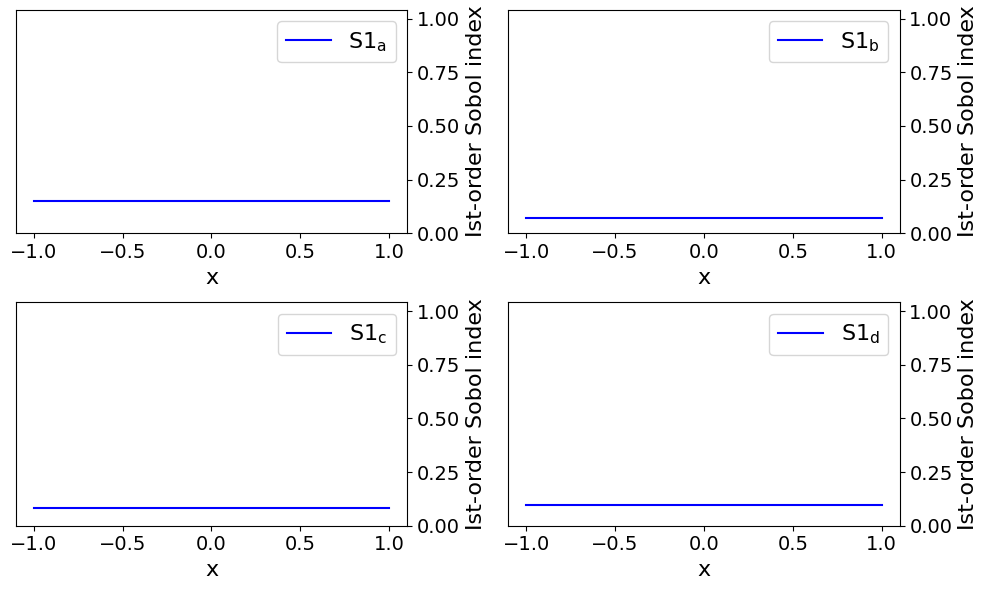

In [7]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(x, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xlabel("x",fontsize=16)
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right',fontsize=16)

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"
plt.tight_layout()
fig.savefig("sobol.png",dpi=800)
plt.show()

[[[        nan  0.13141568 -0.09721326 -0.05136459]
  [        nan         nan  0.24316739  0.21912909]
  [        nan         nan         nan  0.08690123]
  [        nan         nan         nan         nan]]

 [[        nan  0.13141568 -0.09721326 -0.05136459]
  [        nan         nan  0.24316739  0.21912909]
  [        nan         nan         nan  0.08690123]
  [        nan         nan         nan         nan]]

 [[        nan  0.13141568 -0.09721326 -0.05136459]
  [        nan         nan  0.24316739  0.21912909]
  [        nan         nan         nan  0.08690123]
  [        nan         nan         nan         nan]]

 ...

 [[        nan  0.13141568 -0.09721326 -0.05136459]
  [        nan         nan  0.24316739  0.21912909]
  [        nan         nan         nan  0.08690123]
  [        nan         nan         nan         nan]]

 [[        nan  0.13141568 -0.09721326 -0.05136459]
  [        nan         nan  0.24316739  0.21912909]
  [        nan         nan         nan  0.08690123

ValueError: x and y must have same first dimension, but have shapes (100,) and (4, 4)

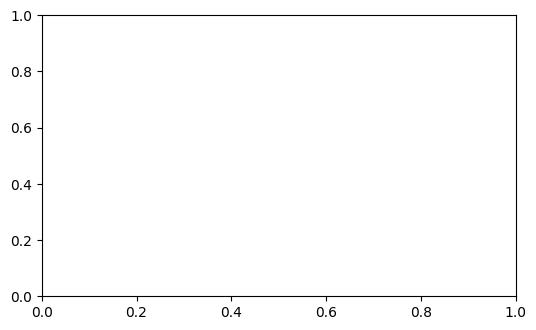

In [6]:
S1s = np.array([s['S2'] for s in sobol_indices])
print(S1s)
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
# ax1 = fig.add_subplot(gs[0, 1])
# ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0]):
    ax.plot(x, S1s[i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xlabel("x",fontsize=16)
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right',fontsize=16)

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"
plt.tight_layout()
fig.savefig("sobol.png",dpi=800)
plt.show()